# This is a quick-start file for the assignment. Feel free to erase cells you don't need.

In [1]:
# Your environment is probably missing some packages. We will check and, if necessary, install.
# https://pypi.org/project/yfinance
import pip
from pip._internal.utils.misc import get_installed_distributions
pkgs = ''.join(str(get_installed_distributions(local_only=True)))
if "yfinance" not in pkgs:
    !pip install yfinance
if "lxml" not in pkgs:
    !pip install lxml 

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=db648948dde5a61446fb4d3306a2aa409e5802f0142b46ec3864de24546a511c
  Stored in directory: /Users/friends/Library/Caches/pip/wheels/28/79/3c/08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=85768af8c5a1993f465e79e7c966de5a3be5cea1e9fd86ae8c9b7f0e71d755b2
  Stored in directory: /Users/friends/Library/Caches/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [11]:
# Now we can import yfinance
import yfinance as yf
import pandas as pd
from pathlib import Path

In [3]:
# Let's define some useful constants
START = "2000-07-03"
END   = "2020-08-10"

TICKERS = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMD', 'ANSS', 'APH', 'AVIFY', 'BA', 'BCE', 'CAJ', \
           'CDNS', 'CERN', 'CGNX', 'CHKP', 'CHL', 'CHU', 'CSCO', 'CSGP', 'CTL', 'CTSH', 'CTXS', 'DASTY', \
           'DTEGY', 'ERIC', 'FDS', 'FICO', 'FISV', 'GD', 'GE', 'GIB', 'GLW', 'HEI', 'HPQ', 'IBM', 'IFNNY', \
           'INFY', 'INTC', 'INTU', 'JKHY', 'KKPNY', 'KLAC', 'KYOCY', 'LHX', 'LMT', 'LOGI', 'LRCX', 'MCHP', \
           'MRVL', 'MSFT', 'MSI', 'MU', 'MXIM', 'NICE', 'NOC', 'NOK', 'NTTYY', 'NVDA', 'ORAN', 'ORCL', 'OTEX', \
           'PAYX', 'PTC', 'QCOM', 'RCI', 'ROP', 'SAP', 'SCMWY', 'SFTBF', 'SKM', 'SNPS', 'STM', 'SWKS', 'T', \
           'TDY', 'TEF', 'TER', 'TLK', 'TLSYY', 'TRMB', 'TSM', 'TTDKY', 'TU', 'TXN', 'TYL', 'VIV', 'VOD', \
           'VRSN', 'VZ', 'WDC', 'XLNX', 'ZBRA']

DATAFILE_NAME = "data.pickle"

# https://www.devdungeon.com/content/colorize-terminal-output-python
BOLD  = '\033[1m'
ULINE = '\033[4m'
BLUE  = '\033[34m'
RED   = '\033[31m'
RESET = '\033[0m'

In [4]:
len(TICKERS)

94

## You need to consult `pandas` documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html to complete this assignment

In [147]:
# It's practical to download data from Yahoo!Finance just once and keep a local copy
if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data = yf.download(tickers=TICKERS, start=START, end=END, group_by='ticker', auto_adjust=True)
    data.to_pickle(DATAFILE_NAME) # save localy

In [148]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5060 entries, 2000-07-03 to 2020-08-07
Columns: 470 entries, ('JKHY', 'Open') to ('AAPL', 'Volume')
dtypes: float64(470)
memory usage: 18.2 MB
None


In [149]:
print ('from', data.index.min()) 
print ('to', data.index.max())

from 2000-07-03 00:00:00
to 2020-08-07 00:00:00


In [150]:
# prepaire a date
date = pd.to_datetime('2019-05-20')
# variable date contains now an object of class Timestamp
print(date.day_name(), date.date())

Monday 2019-05-20


In [151]:
# Let's see how Apple closed at 20.5.2019
# Get the value in the row '2019-05-20' and the column ('AAPL', 'Close')
close_value = data.loc[date, ('AAPL', 'Close')]
print(BOLD + ULINE + BLUE +'Close on {}:'.format(date.date()) + RESET, '{:.4f}'.format(close_value))
# on string formating see https://pyformat.info

Close on 2019-05-20: 180.6051


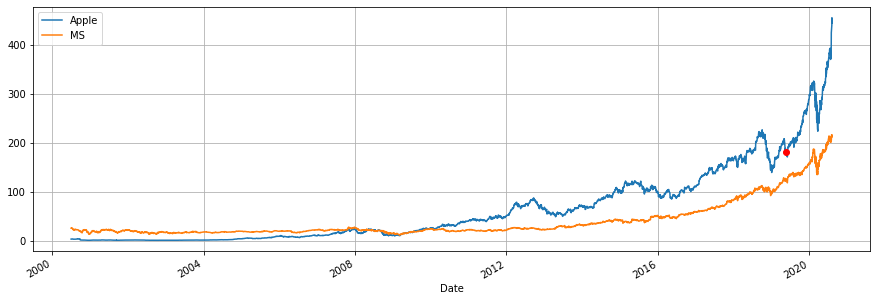

In [152]:
# visualise a couple of time series and point out the value
series = [('AAPL','Close'), ('MSFT', 'Close')]
ax = data[series].plot(figsize=(15,5), grid=True)
ax.legend(['Apple', 'MS'])
show_value = data.loc[date, ('AAPL', 'Close')]
ax.plot([date], [show_value], marker='o', color='r')
# more on visualisetion with low-level control se https://matplotlib.org/users
# for making interactive plots se https://plotly.com/python/getting-started 

## 1. Find a stock among all 94 in TICKERS that had the biggest LOW/HIGH difference during one day. Whats is the name of the company? What date was it? How big was the swing in percent?

In [153]:
data.shape

(5060, 470)

In [154]:
data.head()

JKHY                                                KKPNY  \
                 Open       High        Low      Close    Volume      Open   
Date                                                                         
2000-07-03  19.796038  19.796038  19.202157  19.325882   50600.0  9.050846   
2000-07-05  19.103182  19.845534  18.459811  18.633026  260400.0  9.393884   
2000-07-06  18.732009  19.004204  18.162872  18.855734  326600.0  9.895240   
2000-07-07  19.004197  19.598078  18.905217  19.548588  485800.0  9.974403   
2000-07-10  19.412495  19.796044  18.738193  19.697063  289600.0  9.974402   

                                                     ...     AVIFY            \
                 High       Low      Close   Volume  ...      Open      High   
Date                                                 ...                       
2000-07-03   9.261945  9.011265   9.235558  33600.0  ...  0.370049  0.430465   
2000-07-05   9.512626  9.367496   9.446658  20300.0  ...  0.377600  0.377600   
2000-07-06   9.987596  9.763304   9.908434  47400.0  ...  0.381377  0.381377   
2000-07-07  10.172308  9.974403  10.119534  36700.0  ...  0.381377  0.381377   
2000-07-10  10.119532  9.974402  10.053564  10500.0  ...  0.396481  0.396481   

                                             AAPL                      \
                 Low     Close   Volume      Open      High       Low   
Date                                                                    
2000-07-03  0.370049  0.370049  47000.0  3.217376  3.352398  3.217376   
2000-07-05  0.377600  0.377600   7000.0  3.286816  3.406406  3.132505   
2000-07-06  0.381377  0.381377   5000.0  3.240522  3.267527  3.063065   
2000-07-07  0.381377  0.381377      0.0  3.246309  3.383260  3.217376   
2000-07-10  0.392704  0.396481  28000.0  3.338896  3.595437  3.317678   

                                  
               Close      Volume  
Date                              
2000-07-03  3.290673  17707200.0  
2000-07-05  3.186514  66304000.0  
2000-07-06  3.198087  77386400.0  
2000-07-07  3.360113  65900800.0  
2000-07-10  3.525998  99449000.0  

[5 rows x 470 columns]

In [155]:
s=data.stack(level=0)
idx=(s['High']-s['Low']).idxmax()
data.loc[[idx[0]],[idx[1]]]

CSGP                                         
             Open   High         Low       Close    Volume
Date                                                      
2020-07-29  939.0  939.0  785.429993  829.140015  786100.0

In [162]:
data.stack(level=1)

JKHY          KKPNY           FICO          CSCO  \
Date                                                                           
2000-07-03 Open        19.796038       9.050846      12.596734  4.821889e+01   
           High        19.796038       9.261945      12.596734  4.936017e+01   
           Low         19.202157       9.011265      12.525263  4.802868e+01   
           Close       19.325882       9.235558      12.543131  4.916996e+01   
           Volume   50600.000000   33600.000000   17100.000000  1.487980e+07   
...                          ...            ...            ...           ...   
2020-08-07 Open       181.550003       2.560000     437.869995  4.733000e+01   
           High       185.399994       2.590000     444.769989  4.760000e+01   
           Low        181.300003       2.550000     435.839996  4.703000e+01   
           Close      184.000000       2.570000     441.720001  4.743000e+01   
           Volume  665300.000000  188500.000000  189600.000000  1.704650e+07   

                            AMD           CSGP          NTTYY           OTEX  \
Date                                                                           
2000-07-03 Open    3.850000e+01      25.125000      15.196395       2.388776   
           High    4.250000e+01      25.937500      15.196395       2.388776   
           Low     3.800000e+01      24.500000      14.995738       2.354355   
           Close   4.212500e+01      24.937500      15.156263       2.368123   
           Volume  3.930000e+06   14100.000000  200000.000000  522400.000000   
...                         ...            ...            ...            ...   
2020-08-07 Open    8.667000e+01     834.780029      23.840000      47.520000   
           High    8.729000e+01     839.969971      23.840000      47.520000   
           Low     8.267000e+01     826.570007      23.660000      45.369999   
           Close   8.485000e+01     830.419983      23.809999      45.810001   
           Volume  6.649800e+07  153600.000000   68800.000000  922400.000000   

                            CHL         SFTBF  ...          MXIM  \
Date                                           ...                 
2000-07-03 Open    2.333760e+01     -0.020245  ...  4.027723e+01   
           High    2.359451e+01     -0.020995  ...  4.205253e+01   
           Low     2.320500e+01     -0.018745  ...  4.020326e+01   
           Close   2.359451e+01     -0.020245  ...  4.193233e+01   
           Volume  2.628000e+05  19800.000000  ...  1.099900e+06   
...                         ...           ...  ...           ...   
2020-08-07 Open    3.446000e+01     61.939999  ...  6.872000e+01   
           High    3.500000e+01     61.939999  ...  6.952000e+01   
           Low     3.440000e+01     60.810001  ...  6.832000e+01   
           Close   3.492000e+01     61.900002  ...  6.869000e+01   
           Volume  1.217700e+06   4000.000000  ...  5.036800e+06   

                           MSFT          ADBE          INTC         KYOCY  \
Date                                                                        
2000-07-03 Open    2.543147e+01  3.203615e+01  4.246971e+01     53.574716   
           High    2.555115e+01  3.223793e+01  4.334048e+01     53.574716   
           Low     2.533174e+01  3.143082e+01  4.234107e+01     52.826246   
           Close   2.553120e+01  3.175677e+01  4.334048e+01     52.865639   
           Volume  1.573480e+07  1.652800e+06  1.508380e+07   7400.000000   
...                         ...           ...           ...           ...   
2020-08-07 Open    2.143319e+02  4.608700e+02  4.853000e+01     57.279999   
           High    2.151798e+02  4.617900e+02  4.865000e+01     57.299999   
           Low     2.104213e+02  4.450900e+02  4.770000e+01     56.959999   
           Close   2.119676e+02  4.495700e+02  4.803000e+01     57.220001   
           Volume  2.778960e+07  3.288300e+06  3.674600e+07  20900.000000   

                           CTXS          CERN          AKAM

High(939.0) is 119.5 percent of Low (785.429993)

## 2. For that company find the month when standard deviation in Close value was the lowest.  Print out the month and the year.

In [156]:
data.head()

JKHY                                                KKPNY  \
                 Open       High        Low      Close    Volume      Open   
Date                                                                         
2000-07-03  19.796038  19.796038  19.202157  19.325882   50600.0  9.050846   
2000-07-05  19.103182  19.845534  18.459811  18.633026  260400.0  9.393884   
2000-07-06  18.732009  19.004204  18.162872  18.855734  326600.0  9.895240   
2000-07-07  19.004197  19.598078  18.905217  19.548588  485800.0  9.974403   
2000-07-10  19.412495  19.796044  18.738193  19.697063  289600.0  9.974402   

                                                     ...     AVIFY            \
                 High       Low      Close   Volume  ...      Open      High   
Date                                                 ...                       
2000-07-03   9.261945  9.011265   9.235558  33600.0  ...  0.370049  0.430465   
2000-07-05   9.512626  9.367496   9.446658  20300.0  ...  0.377600  0.377600   
2000-07-06   9.987596  9.763304   9.908434  47400.0  ...  0.381377  0.381377   
2000-07-07  10.172308  9.974403  10.119534  36700.0  ...  0.381377  0.381377   
2000-07-10  10.119532  9.974402  10.053564  10500.0  ...  0.396481  0.396481   

                                             AAPL                      \
                 Low     Close   Volume      Open      High       Low   
Date                                                                    
2000-07-03  0.370049  0.370049  47000.0  3.217376  3.352398  3.217376   
2000-07-05  0.377600  0.377600   7000.0  3.286816  3.406406  3.132505   
2000-07-06  0.381377  0.381377   5000.0  3.240522  3.267527  3.063065   
2000-07-07  0.381377  0.381377      0.0  3.246309  3.383260  3.217376   
2000-07-10  0.392704  0.396481  28000.0  3.338896  3.595437  3.317678   

                                  
               Close      Volume  
Date                              
2000-07-03  3.290673  17707200.0  
2000-07-05  3.186514  66304000.0  
2000-07-06  3.198087  77386400.0  
2000-07-07  3.360113  65900800.0  
2000-07-10  3.525998  99449000.0  

[5 rows x 470 columns]

In [157]:
close_value = s[s.index.get_level_values(1) == 'CSGP']['Close'].reset_index()#.min()
close_value['Date'] = pd.to_datetime(close_value['Date'])
close_value

,Date,level_1,Close
0,2000-07-03,CSGP,24.937500
1,2000-07-05,CSGP,25.625000
2,2000-07-06,CSGP,27.500000
3,2000-07-07,CSGP,26.375000
4,2000-07-10,CSGP,26.937500
...,...,...,...
5052,2020-08-03,CSGP,835.000000
5053,2020-08-04,CSGP,829.369995
5054,2020-08-05,CSGP,840.849976
5055,2020-08-06,CSGP,831.500000


In [159]:
std = close_value.groupby([close_value['Date'].dt.month, close_value['Date'].dt.year])['Close'].std()
std.idxmin()

(1, 2004)

## 3. The volatility of a stock is the fluctuation of price during a day. Find the company among all in TICKERS with the highest _median_ volatility in percent during the month you identified in (2). What is the name of this company?

In [183]:
data_sub= s.reset_index()
data_sub

,Date,level_1,Close,High,Low,Open,Volume
0,2000-07-03,AAPL,3.290673,3.352398,3.217376,3.217376,17707200.0
1,2000-07-03,ADBE,31.756767,32.237930,31.430818,32.036152,1652800.0
2,2000-07-03,ADI,54.067356,54.151770,51.745963,51.999206,1735700.0
3,2000-07-03,ADP,26.978115,27.816146,26.784724,27.751682,682700.0
4,2000-07-03,ADSK,8.714822,8.714822,8.109626,8.238230,643600.0
...,...,...,...,...,...,...,...
475353,2020-08-07,VRSN,210.399994,212.190002,208.820007,211.309998,409000.0
475354,2020-08-07,VZ,58.529999,58.549999,57.650002,57.820000,12779500.0
475355,2020-08-07,WDC,36.990002,37.900002,36.500000,37.389999,10240900.0
475356,2020-08-07,XLNX,107.069649,108.743546,106.202806,108.305142,2165000.0


In [244]:
from datetime import datetime, timedelta, time,date

data_sub['Date'] = pd.to_datetime(data_sub['Date'])
start_str= '2004-01-01'
start_date= datetime.strptime(start_str,'%Y-%m-%d')
end_str= '2004-02-01'
end_date= datetime.strptime(end_str,'%Y-%m-%d')

mask = (data_sub['Date'] >= start_date.strftime('%Y-%m-%d')) & (data_sub['Date'] < end_date.strftime('%Y-%m-%d'))
df = data_sub.loc[mask]
df
df['Val_Diff'] = df['Open'] - df['Close']
print(df['Val_Diff'].max())
df[df.Val_Diff == df.Val_Diff.max()]

2.8188473583655025


/Users/friends/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,level_1,Close,High,Low,Open,Volume,Val_Diff
83896,2004-01-23,LRCX,26.255026,29.091943,26.065297,29.073873,8313600.0,2.818847


## 4. Create a candlestick chart for the two stocks you found in (1) and (3) and for the month you identified. Make sure that x-axis displays the dates.

In [261]:
df_LRCX = df[df['level_1'] == "LRCX"]
df_LRCX.shape
df_CSGP = df[df['level_1'] == "CSGP"]
df_CSGP.shape

(20, 8)

In [263]:
#!pip install plotly
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df_LRCX['Date'],
                open=df_LRCX['Open'],
                high=df_LRCX['High'],
                low=df_LRCX['Low'],
                close=df_LRCX['Close'])])

fig.show()

In [264]:
#!pip install plotly
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df_CSGP['Date'],
                open=df_CSGP['Open'],
                high=df_CSGP['High'],
                low=df_CSGP['Low'],
                close=df_CSGP['Close'])])

fig.show()

## 5. Write your reflections on the assignment. What was easy? What was hard? How much time did you spend on the assignment?

Working with multi-index dataframe was indeed a challange, The clues provided made the assignment easy and fun. I spent 4-5 hours to complete the assignment.